In [ ]:
!pip install kaggle



In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"najwandzulfiqar","key":"108e4b528ab080127bcc0014d387300c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:21<00:00, 176MB/s]
100% 1.98G/1.98G [00:21<00:00, 99.1MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip
!ls  # untuk verifikasi folder telah muncul


Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    print(root)
    for name in dirs:
        print("📁", name)
    break  # hanya tampilkan level atas


.
📁 .config
📁 test
📁 validation
📁 train
📁 sample_data


In [ ]:
import os, shutil, random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Direktori
train_dir = "/content/train"
validation_dir = "/content/validation"
test_dir = "/content/test"


# Preprocessing & Augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Preprocessing untuk validation dan test (hanya rescale)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load image dan otomatis label dari direktori train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Load image dan otomatis label dari direktori validation
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Load image dan otomatis label dari direktori test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Keep shuffle False for evaluation
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Hindari overfitting
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.0426 - loss: 3.5488 - val_accuracy: 0.0997 - val_loss: 3.0996
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.1118 - loss: 3.2099 - val_accuracy: 0.2507 - val_loss: 2.5752
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.1374 - loss: 2.9407 - val_accuracy: 0.4103 - val_loss: 2.1756
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.2140 - loss: 2.6807 - val_accuracy: 0.3932 - val_loss: 2.0423
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.2307 - loss: 2.6107 - val_accuracy: 0.4074 - val_loss: 1.9348
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.2498 - loss: 2.4587 - val_accuracy: 0.4587 - val_loss: 1.7608
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.2693 - loss: 2.3796 - val_accuracy: 0.4558 - val_loss: 1.8033
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.2955 - loss: 2.3751 - val_accuracy: 0.

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"✅ Akurasi pada test set: {acc * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9196 - loss: 0.3477
✅ Akurasi pada test set: 93.59%


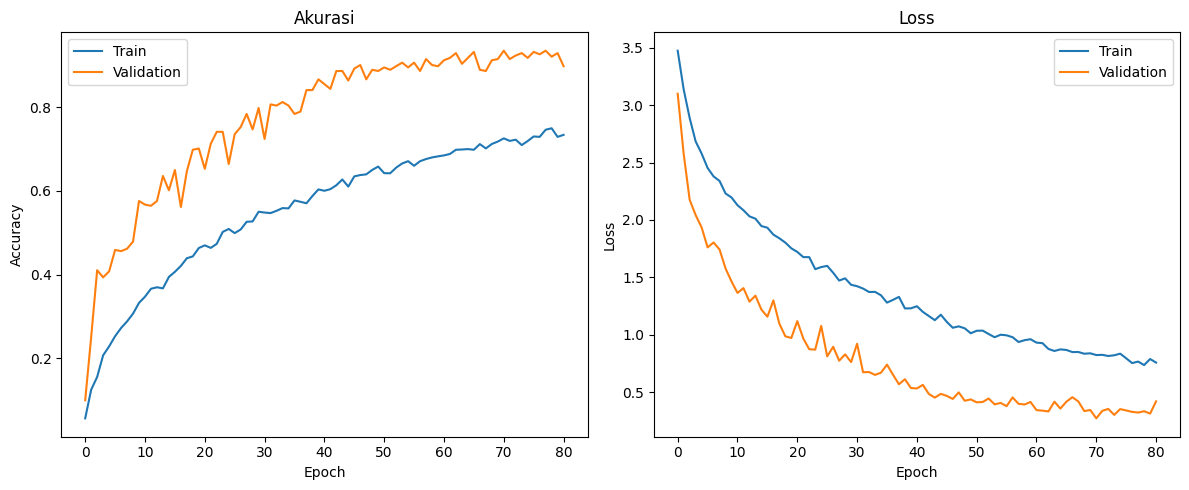

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
# Langkah prediksi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [ ]:
# Ground truth dari generator
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


In [ ]:
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


               precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.82      0.90      0.86        10
      cabbage       0.91      1.00      0.95        10
     capsicum       0.82      0.90      0.86        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.80      0.89        10
         corn       0.88      0.70      0.78        10
     cucumber       1.00      0.90      0.95        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       0.77      1.00      0.87        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1.00        10
        l

In [ ]:
# Simpan model ke file
model.save('model_buah_sayur.h5')


In [ ]:
from google.colab import files
files.download('model_buah_sayur.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
code = '''
import streamlit as st
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

model = load_model("model/model.h5")  # Sesuaikan dengan path model kamu

st.title("Klasifikasi Buah & Sayur")

uploaded_file = st.file_uploader("Upload gambar", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).resize((100, 100))  # Ukuran sesuai input model
    st.image(image, caption="Gambar yang diupload", use_column_width=True)
    image_array = np.expand_dims(np.array(image) / 255.0, axis=0)
    prediction = model.predict(image_array)
    label = np.argmax(prediction)
    st.write("Prediksi kelas:", label)
'''
with open("app.py", "w") as f:
    f.write(code)


In [ ]:
reqs = '''
streamlit
tensorflow
numpy
Pillow
'''
with open("requirements.txt", "w") as f:
    f.write(reqs)


In [ ]:
dockerfile = '''
FROM python:3.9

WORKDIR /app
COPY . .

RUN pip install --upgrade pip
RUN pip install -r requirements.txt

CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0"]
'''
with open("Dockerfile", "w") as f:
    f.write(dockerfile)


In [ ]:
!pip install -q huggingface_hub


In [ ]:
from huggingface_hub import login
login()  # Masukkan token HF kamu


In [ ]:
from huggingface_hub import create_repo, upload_folder

# Buat Space baru (pastikan 'repo_type' = "space" dan 'space_sdk' = "docker")
create_repo(
    repo_id="projek-classifier", # Corrected argument name
    repo_type="space",
    space_sdk="docker"
)

upload_folder(
    folder_path=".",  # Upload semua isi folder
    repo_id="najwandz/projek-classifier",  # Ganti USERNAME kamu
    repo_type="space"
)

It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`huggingface-cli upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.


Uploading Batch [01/11]...:   0%|          | 0.00/2.41G [00:00<?, ?B/s]

Uploading Batch [02/11]...:   0%|          | 0.00/224M [00:00<?, ?B/s]

Uploading Batch [03/11]...:   0%|          | 0.00/166M [00:00<?, ?B/s]

Uploading Batch [04/11]...:   0%|          | 0.00/204M [00:00<?, ?B/s]

Uploading Batch [05/11]...:   0%|          | 0.00/229M [00:00<?, ?B/s]

Uploading Batch [06/11]...:   0%|          | 0.00/210M [00:00<?, ?B/s]

Uploading Batch [07/11]...:   0%|          | 0.00/249M [00:00<?, ?B/s]

Uploading Batch [08/11]...:   0%|          | 0.00/164M [00:00<?, ?B/s]

Uploading Batch [09/11]...:   0%|          | 0.00/148M [00:00<?, ?B/s]

Uploading Batch [10/11]...:   0%|          | 0.00/229M [00:00<?, ?B/s]

Uploading Batch [11/11]...:   0%|          | 0.00/65.8M [00:00<?, ?B/s]

HfHubHTTPError: (Request ID: Root=1-6878333c-2c3b9775304c02fe796524a3;79e241dc-b4f9-4a62-a839-72d4e2beadad)

403 Forbidden: Repository storage limit reached (Max: 1 GB).
Cannot access content at: https://huggingface.co/api/spaces/najwandz/projek-classifier/commit/main.
Make sure your token has the correct permissions.